In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import pandas as pd   
from IPython.display import display_html 
    

In [2]:
file=pd.read_csv("nyccleaned.csv",header=0)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:

file=file[(file["PickupBorough"]!="Unknown")&(file["DropoffBorough"]!="Unknown")]
file=file[(file["PickupBorough"]!="EWR")&(file["DropoffBorough"]!="Unknown")]

In [4]:
print(file.head)

<bound method NDFrame.head of          Unnamed: 0       TripStart         TripEnd  passenger_count  \
0                 0   4/1/2020 0:41   4/1/2020 1:01                1   
1                 1  4/1/2020 16:59  4/1/2020 17:09                1   
2                 2  4/1/2020 10:27  4/1/2020 10:44                1   
3                 3  4/1/2020 12:43  4/1/2020 12:47                1   
4                 4  4/1/2020 13:58  4/1/2020 14:10                1   
...             ...             ...             ...              ...   
1006750     1006750   5/6/2020 7:06   5/6/2020 7:07                1   
1006751     1006751   5/6/2020 8:09   5/6/2020 8:09                3   
1006752     1006752  5/6/2020 17:09  5/6/2020 17:17                1   
1006753     1006753  5/6/2020 20:26  5/6/2020 20:54                2   
1006754     1006754  5/6/2020 19:30  5/6/2020 19:56                1   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 1.20   

In [5]:
Borough_count=file.groupby(["PickupBorough"])["RatecodeID"].count().sort_values()

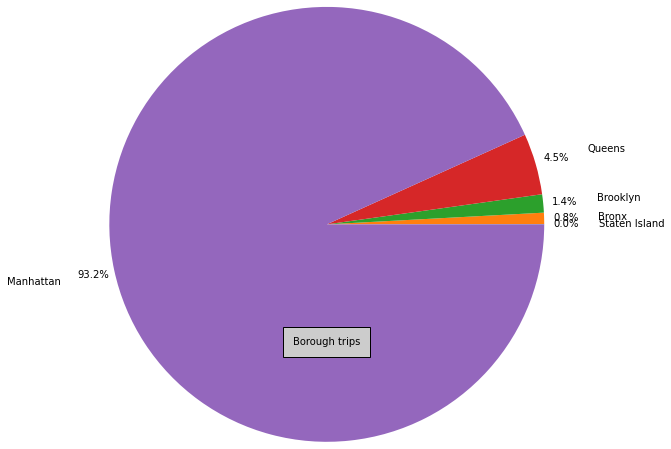

<bound method NDFrame.head of PickupBorough
Staten Island       241
Bronx              8283
Brooklyn          13447
Queens            45122
Manhattan        925536
Name: RatecodeID, dtype: int64>


In [6]:
plt.pie(Borough_count,labels=Borough_count.index, radius = 2.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.xlabel('Borough trips',bbox={'facecolor':'0.8', 'pad':10})
plt.show()
print(Borough_count.head)

It is no suprise that Manhattan has the highest percent from bad parking,smaller area overall and the quickness of the environment.The real focus is on the individual aspect of each part of this chart.


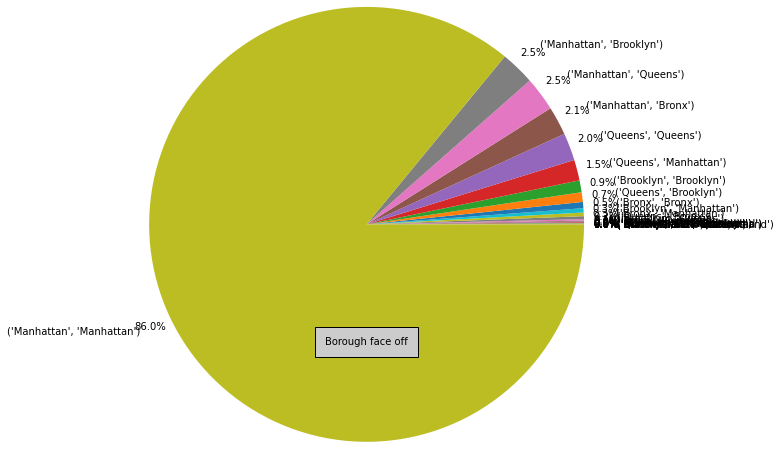

In [7]:
Borough_face_off=file.groupby(["PickupBorough","DropoffBorough"])["RatecodeID"].count().sort_values()
plt.pie(Borough_face_off,labels=Borough_face_off.index, radius = 2.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.15)
plt.xlabel('Borough face off',bbox={'facecolor':'0.8', 'pad':10})
plt.show()

Interesting that  the biggest part of this pie chart is Manhattan.That make sense with my comment above and more to that with Coronavirus no one wants to take the train where there a higher chance of getting sick

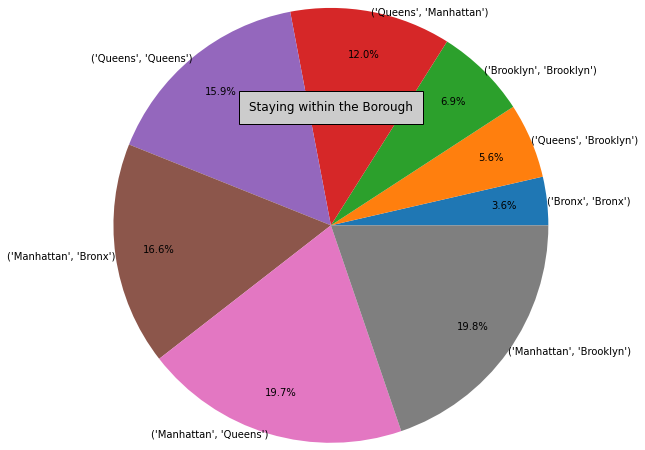

PickupBorough  DropoffBorough
Bronx          Bronx              4590
Queens         Brooklyn           7117
Brooklyn       Brooklyn           8744
Queens         Manhattan         15265
               Queens            20333
Manhattan      Bronx             21148
               Queens            25168
               Brooklyn          25201
Name: RatecodeID, dtype: int64


In [8]:
Borough_face_off_pickup=file.groupby(["PickupBorough","DropoffBorough"])["RatecodeID"].count().sort_values()
Borough_face_off_pickup.drop(Borough_face_off_pickup.tail(1).index,inplace=True)
Borough_face_off_pickup.drop(Borough_face_off_pickup.head(20).index,inplace=True)

plt.pie(Borough_face_off_pickup,labels=Borough_face_off_pickup.index, radius = 2.5,autopct='%1.1f%%',pctdistance=.8,labeldistance=1)
plt.title('Staying within the Borough',bbox={'facecolor':'0.8', 'pad':10})
plt.show()

print(Borough_face_off_pickup.head(13))


Removing the biggest quantity(Manhattan to Manhattan) and cleaning up the small percent that only pull attention from the main focus we can now see taxis within the same borough has the highest percent .

In [9]:

file=file[(file["PickupBorough"]!="Unknown")]
file=file[(file["PickupBorough"]!="EWR")]

Manhattan=file[(file["PickupBorough"]=="Manhattan")&(file["DropoffBorough"]=="Manhattan")]
Bronx=file[(file["PickupBorough"]=="Bronx")&(file["DropoffBorough"]=="Bronx")]
Queens=file[(file["PickupBorough"]=="Queens")&(file["DropoffBorough"]=="Queens")]
Brooklyn=file[(file["PickupBorough"]=="Brooklyn")&(file["DropoffBorough"]=="Brooklyn")]
Staten_Island=file[(file["PickupBorough"]=="Staten Island")&(file["DropoffBorough"]=="Staten Island")]


Pickto=file.groupby(["PickupZone","DropoffZone"])["total_amount"].count().sort_values()
Dropoffto=file.groupby(["DropoffZone","PickupZone"])["total_amount"].count().sort_values()

WithinBronx=Bronx.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinQueens=Queens.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinBrooklyn=Brooklyn.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinStaten_Island=Staten_Island.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()
WithinManhattan=Manhattan.groupby(["PickupZone","DropoffZone"])["RatecodeID"].count().sort_values()

WithinBronxmean=Bronx.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinQueensmean=Queens.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinBrooklynmean=Brooklyn.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinStaten_Islandmean=Staten_Island.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
WithinManhattanmean=Manhattan.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")


<ipython-input-9-b78e55584a72>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinBronxmean=Bronx.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-9-b78e55584a72>:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinQueensmean=Queens.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-9-b78e55584a72>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  WithinBrooklynmean=Brooklyn.groupby(["PickupZone","DropoffZone"])["total_amount","trip_distance"].mean().sort_values(by="trip_distance")
<ipython-input-9-b78e55584a72>:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of

We now want to drill down further to see the overall pattern we can find within each boroughs to see if we could see a pattern on pickup and dropoff zone.To avoid over getting overwhelm with too much information we will only focus on the top ten areas

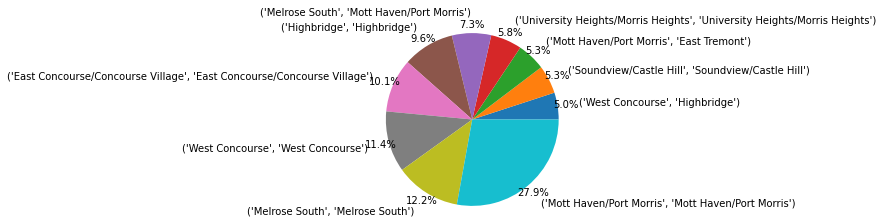

PickupZone                         DropoffZone                      
West Concourse                     Highbridge                            37
Soundview/Castle Hill              Soundview/Castle Hill                 39
Mott Haven/Port Morris             East Tremont                          39
University Heights/Morris Heights  University Heights/Morris Heights     43
Melrose South                      Mott Haven/Port Morris                54
Highbridge                         Highbridge                            71
East Concourse/Concourse Village   East Concourse/Concourse Village      74
West Concourse                     West Concourse                        84
Melrose South                      Melrose South                         90
Mott Haven/Port Morris             Mott Haven/Port Morris               205
Name: RatecodeID, dtype: int64


<ipython-input-10-572c9e276893>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


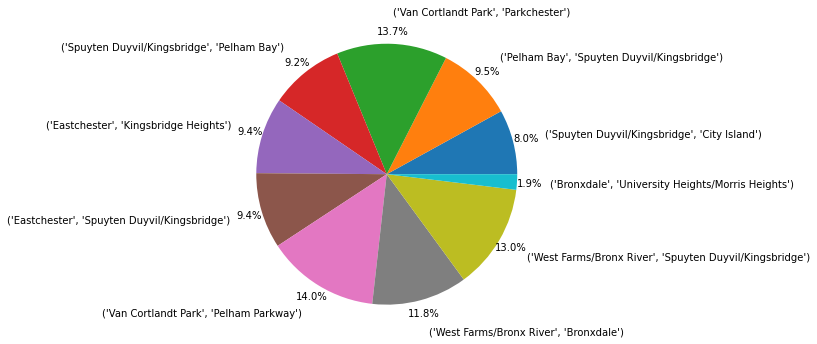

                                                              total_amount  \
PickupZone                 DropoffZone                                       
Spuyten Duyvil/Kingsbridge City Island                           36.800000   
Pelham Bay                 Spuyten Duyvil/Kingsbridge            43.550000   
Van Cortlandt Park         Parkchester                           62.910000   
Spuyten Duyvil/Kingsbridge Pelham Bay                            42.383333   
Eastchester                Kingsbridge Heights                   43.383333   
                           Spuyten Duyvil/Kingsbridge            43.050000   
Van Cortlandt Park         Pelham Parkway                        64.170000   
West Farms/Bronx River     Bronxdale                             54.300000   
                           Spuyten Duyvil/Kingsbridge            59.850000   
Bronxdale                  University Heights/Morris Heights      8.800000   

                                                              t

In [10]:
fig = plt.figure()


WithinBronxtopten=WithinBronx.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBronxtopten,labels=WithinBronxtopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()
print(WithinBronxtopten)

WithinBronxtoptenmean=WithinBronxmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBronxtoptenmean["total_amount"],labels=WithinBronxtoptenmean.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()
print(WithinBronxtoptenmean)


Looking at the following,we see that if driver stay in these area they can monopolies the area and earn the most money by trip by increasing the frequence .

PickupZone                         DropoffZone                         count                          
Highbridge                         Highbridge                            71
East Concourse/Concourse Village   East Concourse/Concourse Village      74
West Concourse                     West Concourse                        84
Melrose South                      Melrose South                         90
Mott Haven/Port Morris             Mott Haven/Port Morris               205


Compare to the other location,the average for these trip earned more for driving less.

PickupZone                  DropoffZone        total_amount   miles             
Van Cortlandt Park         Parkchester          62.910000      13.64
Van Cortlandt Park         Pelham Parkway       64.170000      14.50


With this,we notice that Bronxdale to University Heights Morris Heights has a average cost of  8.800000  but has 
a distance of 23.40 miles making you believe that there this trip is low but if you refer to the pie chart you notice the it 
only 1.3% meaning the quantity of taxi taking that fare it low and this can be seem as an outliner.

PickupZone      DropoffZone                       total_amount   miles 
Bronxdale    University Heights/Morris Heights      8.800000  23.430000   

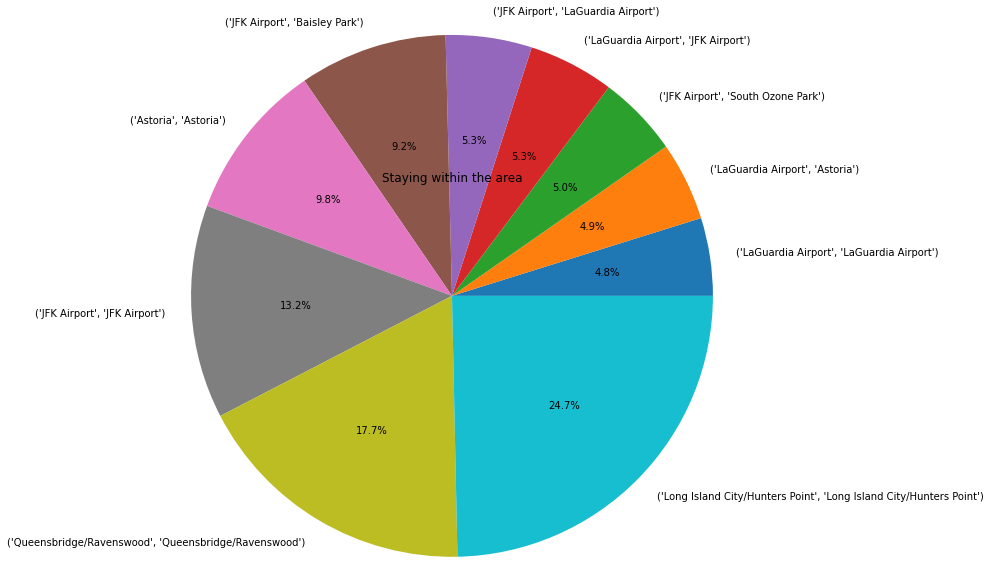

PickupZone                      DropoffZone                   
LaGuardia Airport               LaGuardia Airport                  252
                                Astoria                            255
JFK Airport                     South Ozone Park                   264
LaGuardia Airport               JFK Airport                        278
JFK Airport                     LaGuardia Airport                  279
                                Baisley Park                       480
Astoria                         Astoria                            514
JFK Airport                     JFK Airport                        691
Queensbridge/Ravenswood         Queensbridge/Ravenswood            927
Long Island City/Hunters Point  Long Island City/Hunters Point    1290
Name: RatecodeID, dtype: int64


<ipython-input-11-8e0de1e83ba5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


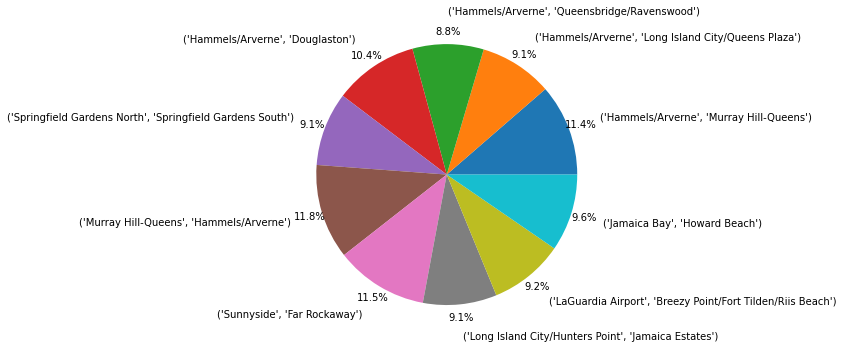

                                                                    total_amount  \
PickupZone                     DropoffZone                                         
Hammels/Arverne                Murray Hill-Queens                        92.6900   
                               Long Island City/Queens Plaza             73.8925   
                               Queensbridge/Ravenswood                   71.8400   
                               Douglaston                                85.0900   
Springfield Gardens North      Springfield Gardens South                 74.5500   
Murray Hill-Queens             Hammels/Arverne                           95.8400   
Sunnyside                      Far Rockaway                              93.6400   
Long Island City/Hunters Point Jamaica Estates                           74.5500   
LaGuardia Airport              Breezy Point/Fort Tilden/Riis Beach       75.1950   
Jamaica Bay                    Howard Beach                              78.

In [11]:
WithinQueensTopTen=WithinQueens.tail(10)
plt.pie(WithinQueensTopTen,labels=WithinQueensTopTen.index, radius = 3,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()

print(WithinQueensTopTen)


WithinQueensmeantopten=WithinQueensmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinQueensmeantopten["total_amount"],labels=WithinQueensmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinQueensmeantopten)


The following are the main ones  taxi driver should focus.The the interesting thing is that  LaGuardia Airport and JFk are the main one not from coming from other regions but to each other.
PickupZone                      DropoffZone                       count                      
Astoria                         Astoria                            514
JFK Airport                     JFK Airport                        691
Queensbridge/Ravenswood         Queensbridge/Ravenswood            927
Long Island City/Hunters Point  Long Island City/Hunters Point    1290

Taking trip from the top three earn you close to $100 for a about an hour ride.Jamaica Bay to Howard Beach should be avoided as the money earn is not worth for the amount of driving.
PickupZone                      DropoffZone              Total          trip 
Hammels/Arverne                Murray Hill-Queens        92.6900        23.536667 
Murray Hill-Queens             Hammels/Arverne           95.8400        25.810000
Sunnyside                      Far Rockaway              93.6400        26.070000
Jamaica Bay                    Howard Beach              78.0500        42.910000  

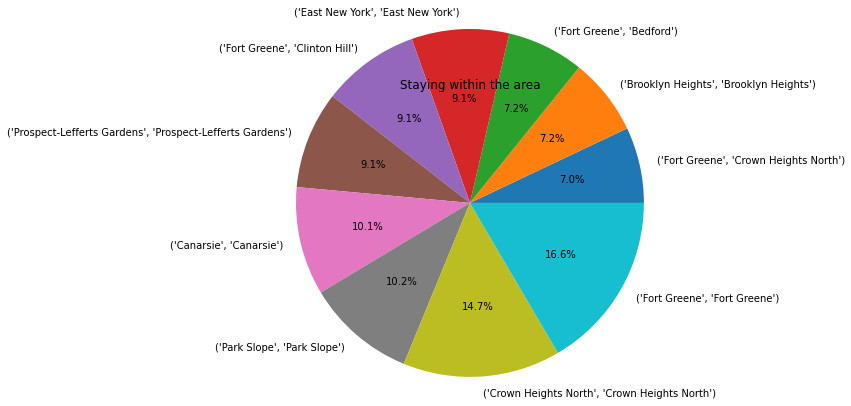

PickupZone                 DropoffZone              
Fort Greene                Crown Heights North           63
Brooklyn Heights           Brooklyn Heights              64
Fort Greene                Bedford                       64
East New York              East New York                 81
Fort Greene                Clinton Hill                  81
Prospect-Lefferts Gardens  Prospect-Lefferts Gardens     81
Canarsie                   Canarsie                      90
Park Slope                 Park Slope                    91
Crown Heights North        Crown Heights North          131
Fort Greene                Fort Greene                  148
Name: RatecodeID, dtype: int64


<ipython-input-12-f365e13da1a3>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


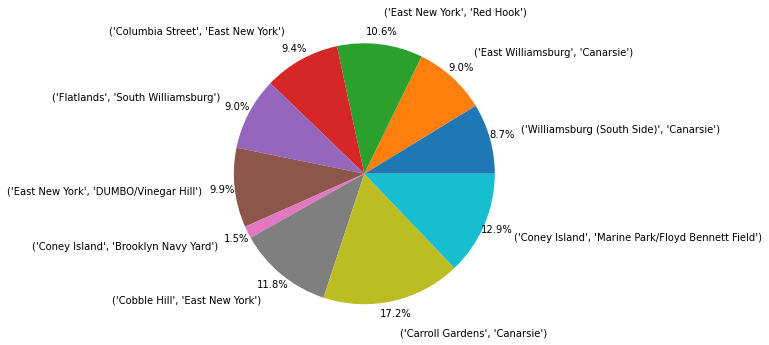

                                                           total_amount  \
PickupZone                DropoffZone                                     
Williamsburg (South Side) Canarsie                            56.050000   
East Williamsburg         Canarsie                            58.050000   
East New York             Red Hook                            68.005714   
Columbia Street           East New York                       60.550000   
Flatlands                 South Williamsburg                  57.800000   
East New York             DUMBO/Vinegar Hill                  63.300000   
Coney Island              Brooklyn Navy Yard                   9.680000   
Cobble Hill               East New York                       75.550000   
Carroll Gardens           Canarsie                           110.465000   
Coney Island              Marine Park/Floyd Bennett Field     82.550000   

                                                           trip_distance  
PickupZone              

In [12]:
WithinBrooklynTopTen=WithinBrooklyn.tail(10)
plt.pie(WithinBrooklynTopTen,labels=WithinBrooklynTopTen.index, radius = 2,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
print(WithinBrooklynTopTen)


WithinBrooklynmeantopten=WithinBrooklynmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinBrooklynmeantopten["total_amount"],labels=WithinBrooklynmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinBrooklynmeantopten)


The following are the main ones  taxi driver should focus.
PickupZone                      DropoffZone                       count 
Prospect-Lefferts Gardens       Prospect-Lefferts Gardens         81
Canarsie                        Canarsie                          90
Park Slope                      Park Slope                        91
 Crown Heights North         Crown Heights North                  131
Fort Greene                     Fort Greene                        148


The below trip is the winner among all the boroughs as trip. 110 for one trip and make up for the shorter manhattan trips.
PickupZone             DropoffZone              Total          trip 
Carroll Gardens         Canarsie               110.465000  24.110000


Below looks like a other outliner.The rate doesn't match the rest and it only 1.2% of the pie
PickupZone             DropoffZone              Total          trip 
Coney Island              Brooklyn Navy Yard      9.680000   23.090000

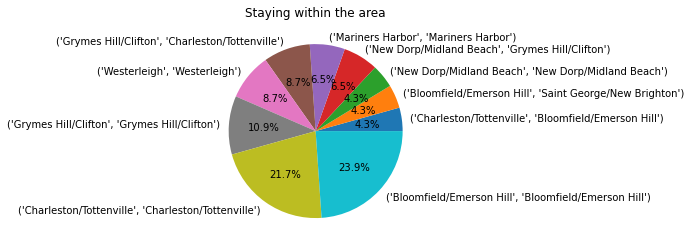

PickupZone               DropoffZone              
Charleston/Tottenville   Bloomfield/Emerson Hill       2
Bloomfield/Emerson Hill  Saint George/New Brighton     2
New Dorp/Midland Beach   New Dorp/Midland Beach        2
                         Grymes Hill/Clifton           3
Mariners Harbor          Mariners Harbor               3
Grymes Hill/Clifton      Charleston/Tottenville        4
Westerleigh              Westerleigh                   4
Grymes Hill/Clifton      Grymes Hill/Clifton           5
Charleston/Tottenville   Charleston/Tottenville       10
Bloomfield/Emerson Hill  Bloomfield/Emerson Hill      11
Name: RatecodeID, dtype: int64


<ipython-input-13-60df2dc5bef3>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


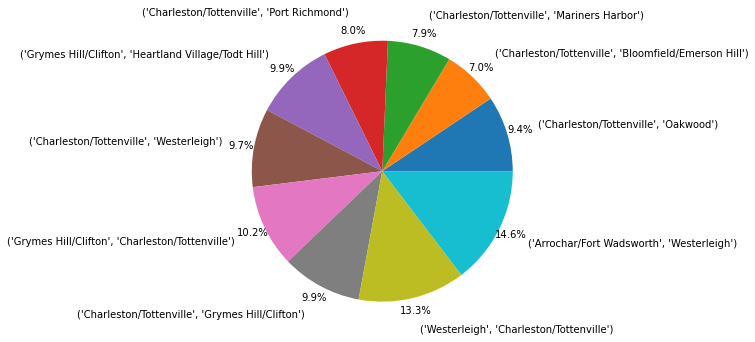

                                                     total_amount  \
PickupZone              DropoffZone                                 
Charleston/Tottenville  Oakwood                             43.55   
                        Bloomfield/Emerson Hill             32.55   
                        Mariners Harbor                     36.55   
                        Port Richmond                       37.05   
Grymes Hill/Clifton     Heartland Village/Todt Hill         46.05   
Charleston/Tottenville  Westerleigh                         45.05   
Grymes Hill/Clifton     Charleston/Tottenville              47.30   
Charleston/Tottenville  Grymes Hill/Clifton                 46.05   
Westerleigh             Charleston/Tottenville              61.55   
Arrochar/Fort Wadsworth Westerleigh                         67.79   

                                                     trip_distance  
PickupZone              DropoffZone                                 
Charleston/Tottenville  Oakwood  

In [13]:
WithinStaten_IslandTopTen=WithinStaten_Island.tail(10)
plt.pie(WithinStaten_IslandTopTen,labels=WithinStaten_IslandTopTen.index, radius = 1,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
print(WithinStaten_IslandTopTen)


WithinStaten_Islandmeantopten=WithinStaten_Islandmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinStaten_Islandmeantopten["total_amount"],labels=WithinStaten_Islandmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinStaten_Islandmeantopten)



Staten island should be avoided based on these number.The amount of request are low but it you lucky you can grab 
shorter trip to earn what appears to be more then normal.

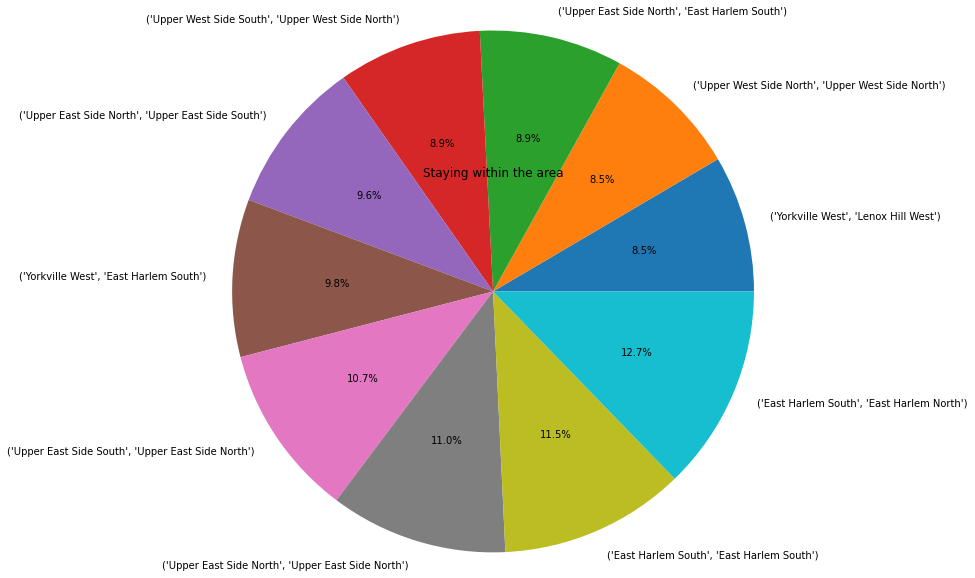

PickupZone             DropoffZone          
Yorkville West         Lenox Hill West          3553
Upper West Side North  Upper West Side North    3559
Upper East Side North  East Harlem South        3724
Upper West Side South  Upper West Side North    3742
Upper East Side North  Upper East Side South    4018
Yorkville West         East Harlem South        4097
Upper East Side South  Upper East Side North    4494
Upper East Side North  Upper East Side North    4616
East Harlem South      East Harlem South        4830
                       East Harlem North        5350
Name: RatecodeID, dtype: int64


<ipython-input-14-4dc50872b03c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)


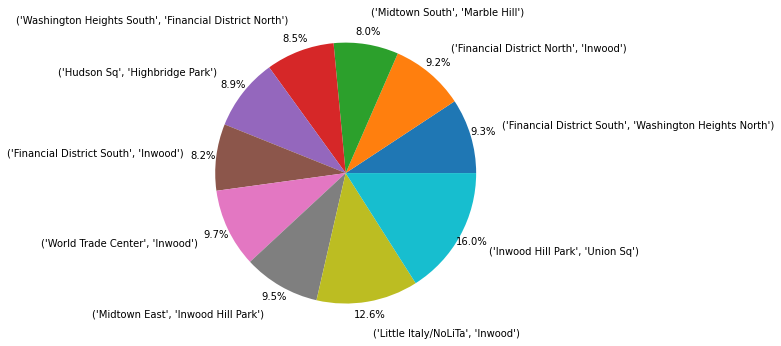

                                                   total_amount  trip_distance
PickupZone               DropoffZone                                          
Financial District South Washington Heights North     50.065714      13.617143
Financial District North Inwood                       49.578750      13.850000
Midtown South            Marble Hill                  43.300000      13.850000
Washington Heights South Financial District North     45.836667      13.964333
Hudson Sq                Highbridge Park              48.300000      14.080000
Financial District South Inwood                       44.525000      14.150000
World Trade Center       Inwood                       52.560000      14.720000
Midtown East             Inwood Hill Park             51.300000      16.320000
Little Italy/NoLiTa      Inwood                       68.033333      17.010000
Inwood Hill Park         Union Sq                     86.300000      26.620000


In [14]:
WithinManhattanTopTen=WithinManhattan.tail(10)
plt.pie(WithinManhattanTopTen,labels=WithinManhattanTopTen.index, radius = 3,autopct='%1.1f%%')
plt.title('Staying within the area')
plt.show()
print(WithinManhattanTopTen)

WithinManhattanmeantopten=WithinManhattanmean.tail(10)
ax2 = fig.add_axes([0, 0, .5, .5], aspect=3)
ax2 =plt.pie(WithinManhattanmeantopten["total_amount"],labels=WithinManhattanmeantopten.index, radius = 1.5,autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.25)
plt.show()

print(WithinManhattanmeantopten)



My original belief while doing this analysis  was that Mahattan would of been the most overcharge but fell within range to the other borough without any major outliners.